Question 1

The perceptron is a supervised learning algorithm and the simplest neural network, consisting of one node.  It is a binary linear classifier.

The training data for this example are 100 points on a 2-dimensional plane.  The target values are the labels, y(i) given to each of the points x(i)

The percptron has a real-valued weight w = (w(1),w(2))
and a real-valued bias, b

The activation function is the unit step function.

Steps:

(0): Initialize the weights and bias vectors to zero, choose learning rate nu (nu = 0.05 was chosen for initial run)

(1): compute the linear combination of the input values and weights: a = Xw + b where X is the matrx containing the training samples with shape (n(samples), n(features))

(2) apply the activation function to a

(3) compute the updates to the weights using the perceptron learning algorithm (PLA) rule:  w_delta = (nu)X_trans(y_hat - y) and b_delta = nu(y_hat - y)
    where y_hat is the matrix of predicted labels

(4) Update the weights and bias:  w = w + w_delta,  b=nu(y_hat - y)

(5) iterate to conversion of y_hat and y

_________________________________________________________________________________________________________________________

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)


%matplotlib inline

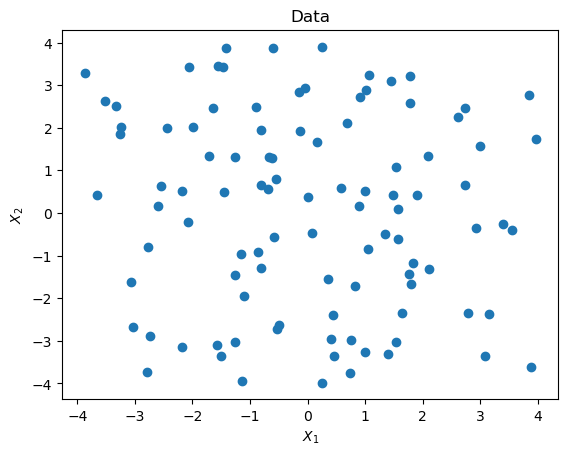

In [286]:
#Generation of data points (part A of question 1)
x_1r = (-4, 4)
x_2r = (-4, 4)

# Generate 100 random points
num_points = 100
x1 = np.random.uniform(x_1r[0], x_1r[1], num_points)
x2 = np.random.uniform(x_2r[0], x_2r[1], num_points)

# Plot the points
plt.scatter(x1, x2)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Data')
plt.show()

In [288]:
#labeling of data points
y=np.zeros(len(x1))
m=2    #slope of decision surface
intercept=2    #x2 intercept

for i in range(len(x1)):
    if x2[i] >= m*x1[i] + intercept:
        y[i] = 1


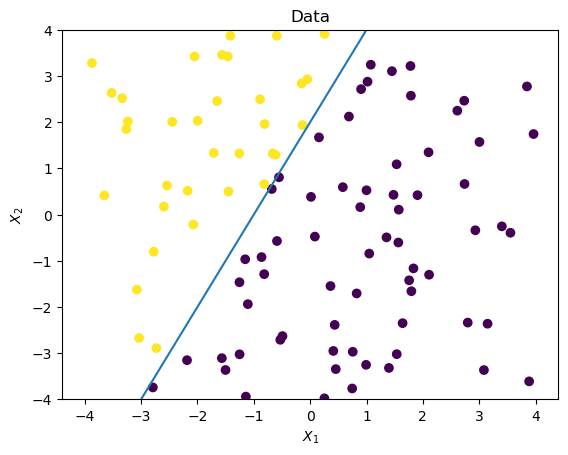

In [290]:
plt.scatter(x1, x2, c=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
x1_hyperplane = np.linspace(-4,4,5)
x2_hyperplane = m * x1_hyperplane + intercept
plt.ylim(-4, 4)
plt.plot(x1_hyperplane, x2_hyperplane, '-')
plt.title('Data')
plt.show()


In [292]:
X = np.column_stack((x1, x2))

In [294]:
#train the weights and bias (part B of problem 1)

n_iters=10
nu = 0.05   #learning rate
n_samples, n_features =  X.shape
weights = np.zeros((n_features,1))
bias = 0

for i in range(n_iters):
    a = np.dot(X, weights) + bias
    y_predict = []
    for j in range(n_samples):
        if a[j] >= 0:
            y_predict = np.append(y_predict, [1], axis=0)
        else:
            y_predict = np.append(y_predict, [0], axis=0)

    delta_w = nu * np.dot(X.T, (y - y_predict))
    delta_b = nu * np.sum(y - y_predict)

    weights += delta_w.reshape(-1, 1)
    bias += delta_b




In [296]:
y_predict

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

In [318]:
#test for convergence performance
delta = []
for k in range(10):
    n_iters=k
    nu = 0.05   #learning rate
    n_samples, n_features =  X.shape
    weights = np.zeros((n_features,1))
    bias = 0

    for i in range(n_iters):
        a = np.dot(X, weights) + bias
        y_predict = []
        for j in range(n_samples):
            if a[j] >= 0:
                y_predict = np.append(y_predict, [1], axis=0)
            else:
                y_predict = np.append(y_predict, [0], axis=0)
    
        delta_w = nu * np.dot(X.T, (y - y_predict))
        delta_b = nu * np.sum(y - y_predict)

        weights += delta_w.reshape(-1, 1)
        bias += delta_b

    delta = np.append(delta, np.mean(np.abs(y_predict - y)))



    

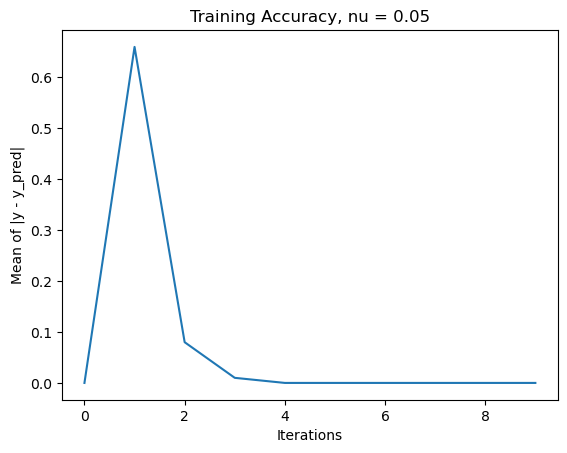

In [302]:
#nu=0.05, itrs=10
x= np.arange(0,10)
plt.xlabel('Iterations')
plt.ylabel('Mean of |y - y_pred|')
plt.title('Training Accuracy, nu = 0.05')
plt.plot(x,delta,'-')
plt.show()

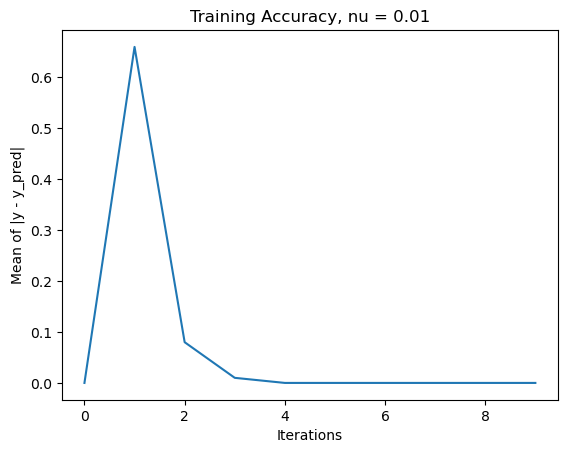

In [308]:
#nu=0.01, itrs=10
x= np.arange(0,10)
plt.xlabel('Iterations')
plt.ylabel('Mean of |y - y_pred|')
plt.title('Training Accuracy, nu = 0.01')
plt.plot(x,delta,'-')
plt.show()

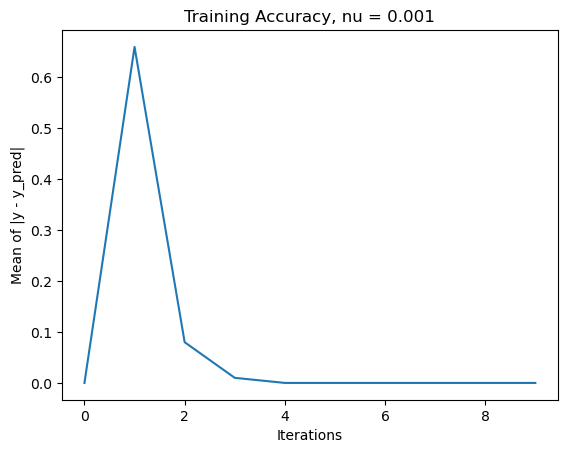

In [312]:
#nu=0.001, itrs=10
x= np.arange(0,10)
plt.xlabel('Iterations')
plt.ylabel('Mean of |y - y_pred|')
plt.title('Training Accuracy, nu = 0.001')
plt.plot(x,delta,'-')
plt.show()

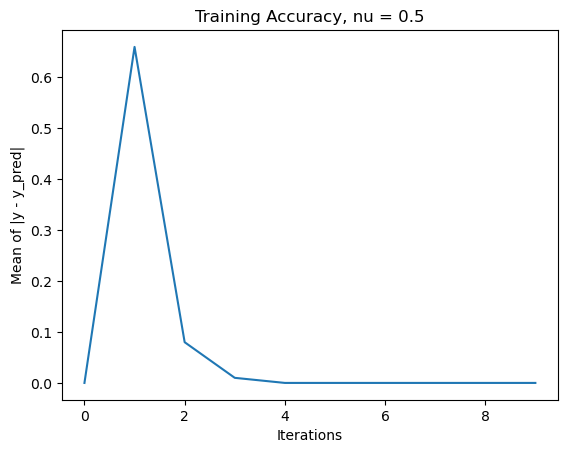

In [316]:
#nu=0.5, itrs=10
x= np.arange(0,10)
plt.xlabel('Iterations')
plt.ylabel('Mean of |y - y_pred|')
plt.title('Training Accuracy, nu = 0.5')
plt.plot(x,delta,'-')
plt.show()

Conclusion

The PLA performs very well, converging in 4 iterations.  The PLA appears to be insensitive to the learning rate, nu. Training can be stopped at 4 iterations regardless of the learning rate.







Question 2

(a) Bias arises in supervised learning when too many assumptions are made about the data, and a too-simple model is used 
to estimate the training data. High bias will arise, for example, when a linear function is used to estimate a quadratic function.
If Yhat is the predected value for data Y, bias is defined as Bias(Yhat) = E(Yhat) - Y, (E(Yhat) is the expectaion value for the predicted vlaue) which will be high when the model is _underfitting_ the
data, as in the above example.  The model can accomodate new, unknown data, but it will do so with high overall error (bias is analgous to accuracy).

(b) Variance is the measure of the spread of data from its mean position.  In machine learning, variance is a measure of the performance of a model when it is trained using different subsets of the data.  It measures how sensitive the model is to the training data, i.e., how much it can adjust to new, unknown data.  A model with high variance is said to _overfit_ the training data - leading to high performance in predicting the training data, but low performance on new, unknown data.

The total error of a predictive model is given by:  Etotal = Bias^2 + Variance + (irreducible error)

In general, it is preferable to have both low bias and low variance, but in parctice, this is not possible.  We desire a model that is complex enough to reflect the complexity of the data, but not too complex that it overfits the training data and can not perform well on test data.  By adjusting hyperparameters, a proper balance can be met between bias and variance.  The graphic below illustrates this concept, known as _bias-variance tradeoff_:

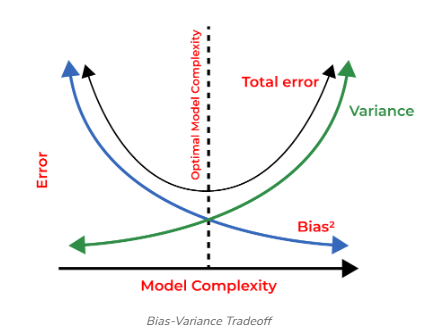


_________________________________________________________________________________________________________________________


Question 3

I choose as my training set the data collected for the 2024 _World Happiness Report_, which consists of numerical data for 140 countries collected by the _Gallup World Poll_.  The data represents respondents answers, on a scale of 1-10, of their self perception of social support, government corruption, self health, etc (a total of seven different attributes).  These numbers were ccombined to form an overall "Happiness" value for each country, and the countries were ranked accordingly.  

The data was diveded into seven regions.  I noticed that Western European countries generally placed highest in the ranking, and African countries ranked consistently toward the bottom of the ranking.  I applied the pseudo inverse method of linear regression on this data to determine if there was a discernable, statistical difference between these two regions in regards to this data.  In the dataset, I replaced the nominal attribute "Western Europe" with "1", and "Africa" with "2" and deleted the data for the remaining regions.  The remaining countries consist of 18 from the Western Europe region, and 40 from the Africa region.

________________________________________________________________________________________________________________________________________

In [200]:
import pandas as pd
df = pd.read_csv('2024_WHR_data_mod2.csv', header=None)

In [202]:
df.head()

,0,1,2,3,4,5,6,7
0,1.844,1.572,0.695,0.859,0.142,0.546,2.082,Western Europe
1,1.908,1.520,0.699,0.823,0.204,0.548,1.881,Western Europe
2,1.881,1.617,0.718,0.819,0.258,0.182,2.050,Western Europe
3,1.878,1.501,0.724,0.838,0.221,0.524,1.658,Western Europe
4,1.901,1.462,0.706,0.725,0.247,0.372,1.906,Western Europe


In [204]:
#separate data from categoreis
X = df.iloc[:,:-1]

In [206]:
X = np.asmatrix(X)

In [208]:
#form the target matrix
Y = df.iloc[:,7]
Y1=np.zeros((58,1))
mapping = {'Western Europe':1, 'Africa':2}
Y1=Y.replace(mapping)
Y1 = np.asmatrix(Y1)
YT=np.transpose(Y1)

C:\Users\slivk\AppData\Local\Temp\ipykernel_28820\810355571.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y1=Y.replace(mapping)


In [210]:
#calculate the optimal weights, w, using the pseudo inverse
XT = np.transpose( X)
XTX = np.matmul( XT, X)
XTXINV = np.linalg.inv( XTX )
XTXINVTR = np.matmul( XTXINV, XT )
w = np.dot( XTXINVTR, YT )

In [212]:
#compute the predicted labels, y_pred - the first 18 are Western Europe, remaining 40 are Africa
#y_bar is the matrix of predicted labels
y_bar=np.matmul(X,w)
y_bar

matrix([[1.39472479],
        [1.31911934],
        [2.25471054],
        [1.21531619],
        [1.59763409],
        [1.34051485],
        [1.33086456],
        [0.95954588],
        [1.57385136],
        [1.50331287],
        [1.20609761],
        [1.48022105],
        [1.23174499],
        [1.31799934],
        [1.71249093],
        [1.52613121],
        [1.45974084],
        [1.69735752],
        [1.56229797],
        [1.85823747],
        [2.16617594],
        [0.80749743],
        [2.24909283],
        [2.62413574],
        [1.84753436],
        [2.1656998 ],
        [2.48027342],
        [2.0983387 ],
        [2.37236477],
        [2.17704797],
        [1.7820142 ],
        [1.72868192],
        [1.96401141],
        [1.78639339],
        [1.14839555],
        [2.07023108],
        [2.04011277],
        [1.83342034],
        [0.78376818],
        [1.75993873],
        [1.63212328],
        [1.91615308],
        [1.92284338],
        [1.9220842 ],
        [1.28128684],
        [1

In [214]:
#calculate some statistics on y_predict
y_delta = y_bar - YT

In [216]:
#overall mean of the difference between predicted label and label
y_delta_mean = np.mean(np.abs(y_delta),axis=0)
print(y_delta_mean)

[[0.47402748]]


In [218]:
#calculate statistics for Western European countries
WE_y = y_bar[0:18]
WE_y_mean = np.mean(WE_y, axis = 0)
print(WE_y_mean)

[[1.45118767]]


In [220]:
WE_y_std = np.std(WE_y, axis = 0)
print(WE_y_std)

[[0.26780353]]


In [224]:
#matrix of labels for Western Europe
WE_YT = YT[0:18]
WE_delta = WE_y - WE_YT
WE_delta_mean = np.mean(np.abs(WE_delta),axis=0)
print(WE_delta_mean)

[[0.45568257]]


In [232]:
WE_delta_std = np.std(np.abs(WE_delta),axis=0)
print(WE_delta_std)

[[0.2600816]]


In [226]:
#calculate the same statistics for African countries
AF_y = y_bar[18:]
AF_y_mean = np.mean(AF_y, axis=0)
print(AF_y_mean)

[[1.63989096]]


In [228]:
AF_y_std = np.std(AF_y,axis=0)
print(AF_y_std)

[[0.5134443]]


In [230]:
AF_YT = YT[18:]
AF_delta = AF_y - AF_YT
AF_delta_mean = np.mean(np.abs(AF_delta),axis=0)
print(AF_delta_mean)

[[0.48228269]]


In [234]:
AF_delta_std = np.std(np.abs(AF_delta),axis=0)
print(AF_delta_std)

[[0.40088274]]


Conclusion

For all countries in both regions, the mean difference between the predicted label and the true label was: 0.4740

The mean y_pred for Western Europe (true labe 1) is 1.4512
The mean y_pred for Africa (true label 2) is 1.6399

The mean, std for delta (|y - y_pred|) for Western Europe:  0.4557, 0.2601
The mean, std for delta (|y - y_pred|) for Africa:  0.4823, 0.4009

I do not see a significant difference between the two regions, and they appear not to be linearly separable.